In [1]:
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import seaborn as sns




In [2]:
Sanalyisi=pd.read_csv(r"sentiment_analysis.csv")
Sanalyisi

,Year,Month,Day,Time of Tweet,text,sentiment,Platform
0,2018,8,18,morning,What a great day!!! Looks like dream.,positive,Twitter
1,2018,8,18,noon,"I feel sorry, I miss you here in the sea beach",positive,Facebook
2,2017,8,18,night,Don't angry me,negative,Facebook
3,2022,6,8,morning,We attend in the class just for listening teac...,negative,Facebook
4,2022,6,8,noon,"Those who want to go, let them go",negative,Instagram
...,...,...,...,...,...,...,...
494,2015,10,18,night,"According to , a quarter of families under six...",negative,Twitter
495,2021,2,25,morning,the plan to not spend money is not going well,negative,Instagram
496,2022,5,30,noon,uploading all my bamboozle pictures of facebook,neutral,Facebook
497,2018,8,10,night,congratulations ! you guys finish a month ear...,positive,Twitter


In [4]:
Sanalyisi.shape

(499, 7)

In [5]:
Sanalyisi.head()

,Year,Month,Day,Time of Tweet,text,sentiment,Platform
0,2018,8,18,morning,What a great day!!! Looks like dream.,positive,Twitter
1,2018,8,18,noon,"I feel sorry, I miss you here in the sea beach",positive,Facebook
2,2017,8,18,night,Don't angry me,negative,Facebook
3,2022,6,8,morning,We attend in the class just for listening teac...,negative,Facebook
4,2022,6,8,noon,"Those who want to go, let them go",negative,Instagram


In [6]:
Sanalyisi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Year           499 non-null    int64 
 1   Month          499 non-null    int64 
 2   Day            499 non-null    int64 
 3   Time of Tweet  499 non-null    object
 4   text           499 non-null    object
 5   sentiment      499 non-null    object
 6   Platform       499 non-null    object
dtypes: int64(3), object(4)
memory usage: 27.4+ KB


In [7]:
Sanalyisi.describe()

,Year,Month,Day
count,499.000000,499.000000,499.000000
mean,2020.394790,6.084168,15.693387
std,2.830991,3.652711,8.804673
min,2010.000000,1.000000,1.000000
25%,2019.000000,2.000000,8.000000
50%,2021.000000,6.000000,15.000000
75%,2023.000000,9.000000,22.000000
max,2023.000000,12.000000,31.000000


In [8]:
Sanalyisi.isnull().sum()

Year             0
Month            0
Day              0
Time of Tweet    0
text             0
sentiment        0
Platform         0
dtype: int64

<Axes: >

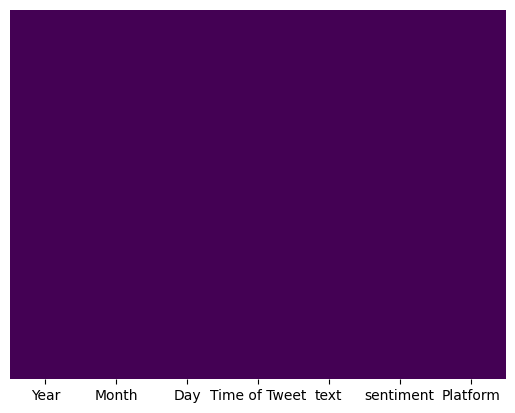

In [9]:
sns.heatmap(Sanalyisi.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [10]:
Sanalyisi.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
494    False
495    False
496    False
497    False
498    False
Length: 499, dtype: bool

In [11]:
Sanalyisi.isnull().sum()

Year             0
Month            0
Day              0
Time of Tweet    0
text             0
sentiment        0
Platform         0
dtype: int64

In [12]:
Sanalyisi['sentiment'].value_counts()

sentiment
neutral     199
positive    166
negative    134
Name: count, dtype: int64

In [13]:
Sanalyisi.replace({'sentiment':{'neutral':'negative'}},inplace=True)

In [14]:
Sanalyisi['sentiment'].value_counts()

sentiment
negative    333
positive    166
Name: count, dtype: int64

In [15]:
Sanalyisi.replace({'sentiment':{'negative':0}},inplace=True)
Sanalyisi.replace({'sentiment':{'positive':1}},inplace=True)
#sentiment.replace({'sentiment':{'neutral':4}},inplace=True)

C:\Users\mohan\AppData\Local\Temp\ipykernel_16920\2480352923.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Sanalyisi.replace({'sentiment':{'positive':1}},inplace=True)


In [16]:
Sanalyisi['sentiment'].value_counts()

sentiment
0    333
1    166
Name: count, dtype: int64

Year            Axes(0.125,0.820769;0.227941x0.0592308)
Month        Axes(0.398529,0.820769;0.227941x0.0592308)
Day          Axes(0.672059,0.820769;0.227941x0.0592308)
sentiment       Axes(0.125,0.749692;0.227941x0.0592308)
dtype: object

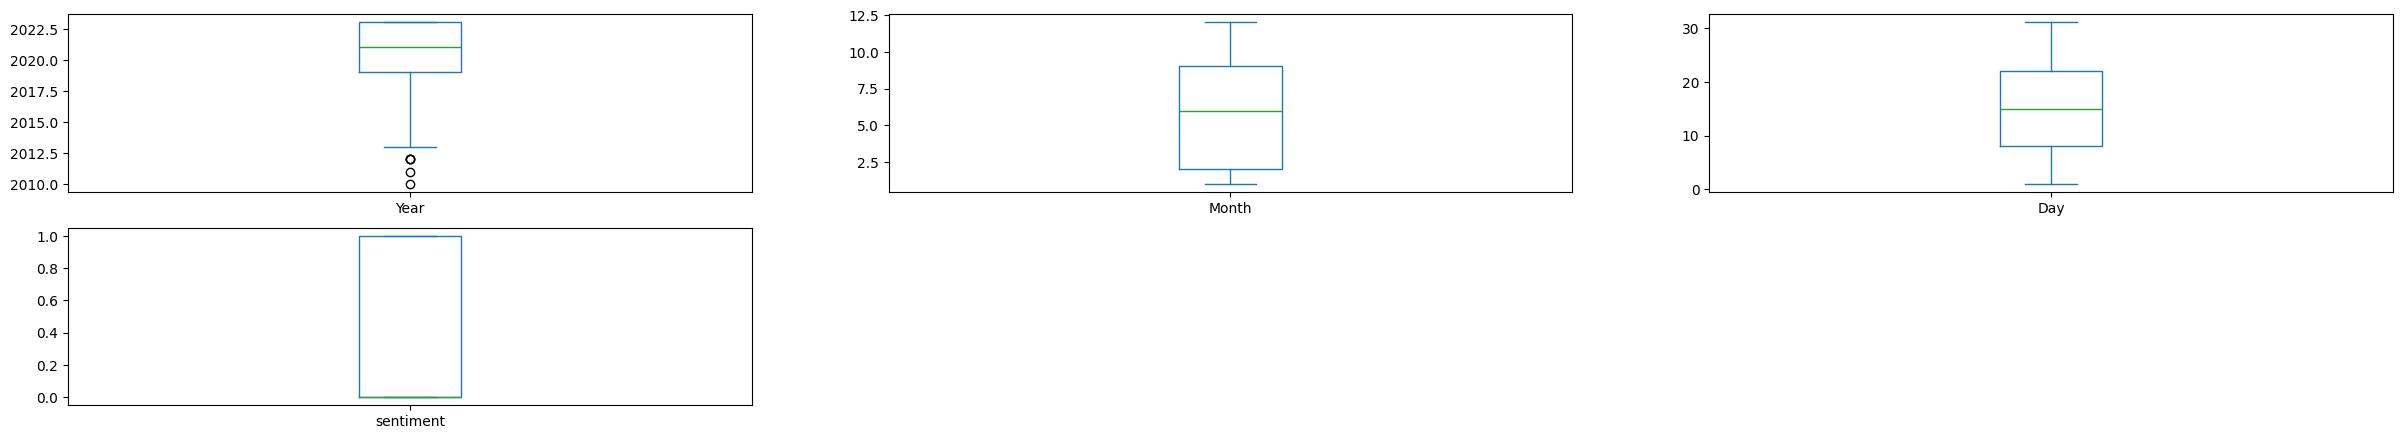

In [17]:
Sanalyisi.plot(kind="box", subplots=True, layout=(11,3), figsize=(30,30))

In [18]:
Sanalyisi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Year           499 non-null    int64 
 1   Month          499 non-null    int64 
 2   Day            499 non-null    int64 
 3   Time of Tweet  499 non-null    object
 4   text           499 non-null    object
 5   sentiment      499 non-null    int64 
 6   Platform       499 non-null    object
dtypes: int64(4), object(3)
memory usage: 27.4+ KB


<Axes: xlabel='sentiment', ylabel='count'>

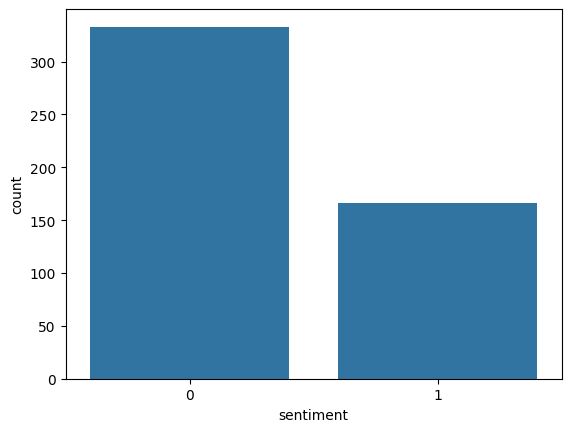

In [19]:
sns.countplot(x=Sanalyisi["sentiment"])

<Axes: xlabel='sentiment', ylabel='count'>

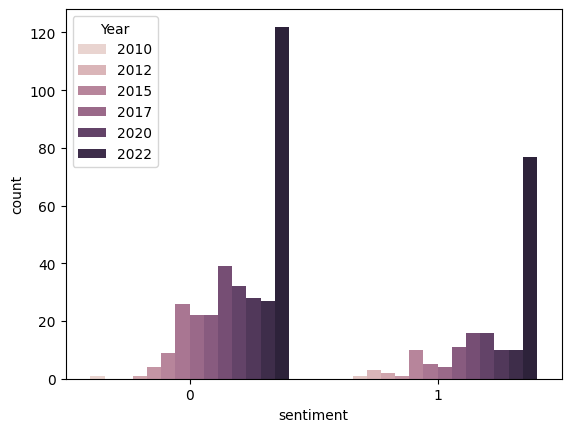

In [20]:
sns.countplot(x='sentiment',hue='Year',data=Sanalyisi)

<Axes: xlabel='sentiment', ylabel='count'>

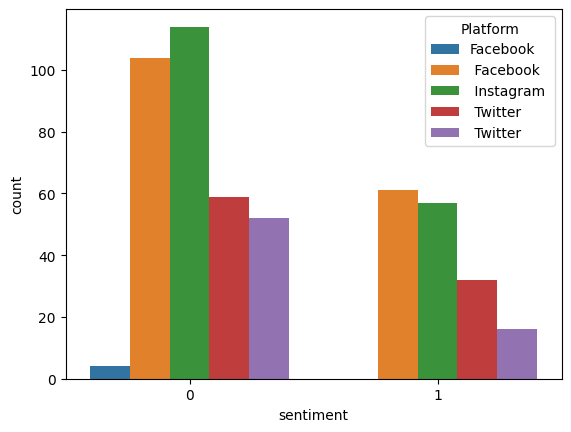

In [21]:
sns.countplot(x='sentiment',hue='Platform',data=Sanalyisi)

In [22]:
Sanalyisi.head()

,Year,Month,Day,Time of Tweet,text,sentiment,Platform
0,2018,8,18,morning,What a great day!!! Looks like dream.,1,Twitter
1,2018,8,18,noon,"I feel sorry, I miss you here in the sea beach",1,Facebook
2,2017,8,18,night,Don't angry me,0,Facebook
3,2022,6,8,morning,We attend in the class just for listening teac...,0,Facebook
4,2022,6,8,noon,"Those who want to go, let them go",0,Instagram


In [23]:
Sanalyisi=Sanalyisi.drop('Time of Tweet',axis=1)

In [24]:
Sanalyisi.head()

,Year,Month,Day,text,sentiment,Platform
0,2018,8,18,What a great day!!! Looks like dream.,1,Twitter
1,2018,8,18,"I feel sorry, I miss you here in the sea beach",1,Facebook
2,2017,8,18,Don't angry me,0,Facebook
3,2022,6,8,We attend in the class just for listening teac...,0,Facebook
4,2022,6,8,"Those who want to go, let them go",0,Instagram


In [27]:
port_stem=PorterStemmer()

def stemming(content):
  stemmed_content=re.sub('[^a-zA-Z]',' ',content)
  stemmed_content=stemmed_content.lower()
  stemmed_content=stemmed_content.split()
  stemmed_content=[port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
  stemmed_content=' '.join(stemmed_content)
  return stemmed_content


In [28]:
Sanalyisi['stemmed_content']=Sanalyisi['text'].apply(stemming)

In [29]:
Sanalyisi

,Year,Month,Day,text,sentiment,Platform,stemmed_content
0,2018,8,18,What a great day!!! Looks like dream.,1,Twitter,great day look like dream
1,2018,8,18,"I feel sorry, I miss you here in the sea beach",1,Facebook,feel sorri miss sea beach
2,2017,8,18,Don't angry me,0,Facebook,angri
3,2022,6,8,We attend in the class just for listening teac...,0,Facebook,attend class listen teacher read slide nonsenc
4,2022,6,8,"Those who want to go, let them go",0,Instagram,want go let go
...,...,...,...,...,...,...,...
494,2015,10,18,"According to , a quarter of families under six...",0,Twitter,accord quarter famili six live poverti
495,2021,2,25,the plan to not spend money is not going well,0,Instagram,plan spend money go well
496,2022,5,30,uploading all my bamboozle pictures of facebook,0,Facebook,upload bamboozl pictur facebook
497,2018,8,10,congratulations ! you guys finish a month ear...,1,Twitter,congratul guy finish month earli booo


In [30]:
print(Sanalyisi['stemmed_content'])

0                           great day look like dream
1                           feel sorri miss sea beach
2                                               angri
3      attend class listen teacher read slide nonsenc
4                                      want go let go
                            ...                      
494            accord quarter famili six live poverti
495                          plan spend money go well
496                   upload bamboozl pictur facebook
497             congratul guy finish month earli booo
498                        actual wish back taho miss
Name: stemmed_content, Length: 499, dtype: object


In [31]:
print(Sanalyisi['sentiment'])

0      1
1      1
2      0
3      0
4      0
      ..
494    0
495    0
496    0
497    1
498    0
Name: sentiment, Length: 499, dtype: int64


In [32]:
x=Sanalyisi['stemmed_content'].values
print(x)



['great day look like dream' 'feel sorri miss sea beach' 'angri'
 'attend class listen teacher read slide nonsenc' 'want go let go'
 'night feel neutral' 'feed babi fun smile coo' 'soooo high' ''
 'today first time arriv boat amaz journey' 'love someth like e mc rule'
 'realli realli like song cardigan taylor swift'
 'sharpi run danger low ink' 'want go music tonight lost voic'
 'alway somewher miss' 'distrub' 'care' 'sick past day'
 'come back home past job realli good time' 'never fall love found'
 'oh maya sorri hope find soon' 'play kid amaz'
 'clean hous famili com later today'
 'tri shtdown pc accenditenli click restart button realli disgust'
 'follow follow' 'amaz game play everyday' 'sorri'
 'villag hardli found intern feel gloomi' 'juss came back baris'
 'went sleep power cut villag' 'look like compani new logo'
 'buy sophi world book realli happi'
 'consol got bmi test hahaha say obes well much unhappi minut'
 'funni cute kid'
 'ahhh slept game gonna tri best watch tomorrow t

In [31]:
print(type(x),len(x))

<class 'numpy.ndarray'> 499


In [33]:
y=Sanalyisi['sentiment'].values
print(y,type(y),len(y))

[1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0
 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 1 0 1 1 0 0 0 0 1 0
 0 1 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 1
 0 0 0 1 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 0 0 0 1 0 0 1 1 0
 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1
 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 0 1 0
 0 0 0 0 1 1 1 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0
 0 0 1 0 0 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1
 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1
 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0
 0 0 0 0 1 0 0 1 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 0 1 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0
 1 0 1 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 1 1 0 1 0 1 0 1 0 1 0 1 1 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)
print(x.shape,y_train.shape,x_test.shape)

(499,) (399,) (100,)


In [35]:
print(x_train)


['morn tweepl' 'u think u bill ha ii finish pay mine broke'
 'tri decid movi friend go well lol p bibl studi nite mean day cake buy'
 'want sit home prom night someon hang'
 'consol got bmi test hahaha say obes well much unhappi minut'
 'yep finish chock full spell grammat error clean tomorrow pop hehe'
 'know neck jack forc pay park bc turn head parallel park free space'
 'play kid amaz' 'love mine happi mother day mom john taylor much love'
 'dec de final hour histori pm went highschool make homework friend' 'thx'
 'know want come keep compani whilst mum friend night nice even'
 'tre depress' 'saw play amaz' 'come save pack pleas'
 'like mind even dear' 'dang last url went http blip fm aigm'
 'http twitpic com sx put camera smoker pit longer vandal door without caught'
 'want go music tonight lost voic'
 'laugh glad self confid wonder trait applaud extra loud okay'
 'mean go come back vancouv way hahah' 'heard fall wait'
 'semest final exam complet hurray' 'went sleep power cut villa

In [36]:
print(type(x_train),len(x_train))

<class 'numpy.ndarray'> 399


In [37]:
print(x_test)

['im think im go fun tonight mayb chang come' 'feel gloomi'
 'jona brother live parti rock hard love song' 'great day look like dream'
 'great day look like dream'
 'well good morn wonder day neighborhood thank follow anoth morn'
 'aaaaaw want live usa' 'miss daddi mommi' 'today'
 'version live interact tran siberian ticket planner launch'
 'play kid amaz' 'omg wango tango awsom love babi take'
 'think need new friend' 'dinner fam miss'
 'buy sophi world book realli happi'
 'okay dedic th tweet fact go appl store huge crack glass screen'
 'lol dammit well next time' 'sharpi run danger low ink' 'need coffe'
 'powerblog powerblog challeng keep talk newbi follow'
 'cook dad lot fun kitchen togeth'
 'mcfli gig last nightt omg amazin didnt sit whole thing mcfli see best mate tutu'
 'clean hous famili com later today'
 'ehhh check dentist app next week though get molar pull root canal'
 'car happi big big dent boot hope theyr go write cross finger wait'
 'talk' 'make happi hear girl talk twe

In [38]:
print(type(x_test),len(x_test))

<class 'numpy.ndarray'> 100


In [39]:
vectorizer=TfidfVectorizer()
x_train=vectorizer.fit_transform(x_train)
x_test=vectorizer.transform(x_test)
print(x_train)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 2385 stored elements and shape (399, 1016)>
  Coords	Values
  (0, 569)	0.6056852063403712
  (0, 925)	0.7957043614436345
  (1, 883)	0.27255655668683487
  (1, 96)	0.3878101894606485
  (1, 383)	0.3878101894606485
  (1, 440)	0.3878101894606485
  (1, 331)	0.3201646557384115
  (1, 648)	0.3451306095390678
  (1, 557)	0.3201646557384115
  (1, 131)	0.3878101894606485
  (2, 913)	0.2647553382149745
  (2, 227)	0.30982996884903263
  (2, 575)	0.27573232707230744
  (2, 349)	0.2647553382149745
  (2, 367)	0.16370785912108407
  (2, 970)	0.24820342815331126
  (2, 514)	0.23584064346749262
  (2, 93)	0.30982996884903263
  (2, 838)	0.2898841270466253
  (2, 603)	0.30982996884903263
  (2, 543)	0.2647553382149745
  (2, 219)	0.16006230279745332
  (2, 144)	0.30982996884903263
  (2, 142)	0.27573232707230744
  (3, 961)	0.29226043480607267
  :	:
  (392, 592)	0.37179918777110843
  (393, 622)	0.597446598224846
  (393, 67)	0.47778345091075564
  (393, 492)	0.6

In [40]:
print(x_test)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 436 stored elements and shape (100, 1016)>
  Coords	Values
  (0, 162)	0.3703504862975375
  (0, 180)	0.28322547988710833
  (0, 354)	0.3171000125250385
  (0, 367)	0.2091500692153129
  (0, 442)	0.5893678340686493
  (0, 539)	0.3267879830923229
  (0, 883)	0.27819500323312313
  (0, 903)	0.3267879830923229
  (1, 319)	0.5712256684861587
  (1, 365)	0.8207930528839417
  (2, 132)	0.4284869627849928
  (2, 396)	0.4814745653565559
  (2, 509)	0.3974912022775124
  (2, 524)	0.291515997134386
  (2, 643)	0.4284869627849928
  (2, 811)	0.3974912022775124
  (3, 219)	0.38443124569357
  (3, 380)	0.5803485358354621
  (3, 503)	0.44109212343142357
  (3, 518)	0.5664326375968135
  (4, 219)	0.38443124569357
  (4, 380)	0.5803485358354621
  (4, 503)	0.44109212343142357
  (4, 518)	0.5664326375968135
  (5, 35)	0.3478639699834466
  :	:
  (95, 30)	0.41541128571786223
  (95, 295)	0.5805743928537587
  (95, 356)	0.543198909012064
  (95, 667)	0.4419296135232684
  

In [41]:
model=LogisticRegression(max_iter=1000)
model.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [42]:
import math

In [43]:
x_train_prediction=model.predict(x_train)
training_data_accuracy=accuracy_score(y_train,x_train_prediction)
print('Accuracy score on the training data:',training_data_accuracy)
training_data_accuracy=(math.ceil(training_data_accuracy*100))
print(f'Accuracy score on training data is:  {training_data_accuracy}%')



Accuracy score on the training data: 0.8370927318295739
Accuracy score on training data is:  84%


In [44]:
x_test_prediction=model.predict(x_test)
test_data_accuracy=accuracy_score(y_test,x_test_prediction)
print(f'Accuracy score on the testing data: {math.ceil(test_data_accuracy*100)}%')

Accuracy score on the testing data: 81%


In [45]:
print(classification_report(y_test,x_test_prediction))

              precision    recall  f1-score   support

           0       0.79      0.97      0.87        67
           1       0.89      0.48      0.63        33

    accuracy                           0.81       100
   macro avg       0.84      0.73      0.75       100
weighted avg       0.82      0.81      0.79       100



In [46]:
import pickle


In [47]:
filename='trained_model.csv'
pickle.dump(model,open(filename,'wb'))

In [48]:
loaded_model=pickle.load(open('trained_model.csv','rb'))
x_new=x_test[20]
print(y_test[20])
prediction = loaded_model.predict(x_new)
print(prediction)
if (prediction[0]==0):
  print('The tweet is negative')
elif (prediction[0]==1):
  print('The tweet is positive')
else:
    print('the tweet is neutral')

1
[0]
The tweet is negative


In [49]:
loaded_model=pickle.load(open('trained_model.csv','rb'))
x_new=x_test[1]
print(y_test[1])
prediction = loaded_model.predict(x_new)
print(prediction)
if (prediction[0]==0):
  print('The tweet is negative')
elif (prediction[0]==1):
  print('The tweet is positive')
else:
    print('the tweet is neutral')

0
[0]
The tweet is negative


In [50]:
loaded_model=pickle.load(open('trained_model.csv','rb'))
x_new=x_test[98]
print(y_test[98])
prediction = loaded_model.predict(x_new)
print(prediction)
if (prediction[0]==0):
  print('The tweet is negative')
elif (prediction[0]==1):
  print('The tweet is positive')
else:
    print('the tweet is neutral')

0
[0]
The tweet is negative


In [51]:
loaded_model=pickle.load(open('trained_model.csv','rb'))
x_new=x_test[98]
print(y_test[98])
prediction = loaded_model.predict(x_new)
print(prediction)

    
if (prediction[0]==0):
      print('The tweet is negative')
elif (prediction[0]==1):
      print('The tweet is positive')
else:
        print('the tweet is neutral')

0
[0]
The tweet is negative


In [52]:
loaded_model=pickle.load(open('trained_model.csv','rb'))
x_new=x_test[3]
print(y_test[3])
prediction = loaded_model.predict(x_new)
print(prediction)

    
if (prediction[0]==0):
      print('The tweet is negative')
elif (prediction[0]==1):
      print('The tweet is positive')
else:
        print('the tweet is neutral')

1
[1]
The tweet is positive


In [53]:
loaded_model=pickle.load(open('trained_model.csv','rb'))
x_new=x_test[4]
print(y_test[4])
prediction = loaded_model.predict(x_new)
print(prediction)

    
if (prediction[0]==0):
      print('The tweet is negative')
elif (prediction[0]==1):
      print('The tweet is positive')
else:
        print('the tweet is neutral')

1
[1]
The tweet is positive


In [54]:
loaded_model=pickle.load(open('trained_model.csv','rb'))
x_new=x_test[5]
print(y_test[5])
prediction = loaded_model.predict(x_new)
print(prediction)

    
if (prediction[0]==0):
      print('The tweet is negative')
elif (prediction[0]==1):
      print('The tweet is positive')
else:
        print('the tweet is neutral')

1
[1]
The tweet is positive


In [55]:
loaded_model=pickle.load(open('trained_model.csv','rb'))
x_new=x_test[6]
print(y_test[6])
prediction = loaded_model.predict(x_new)
print(prediction)

    
if (prediction[0]==0):
      print('The tweet is negative')
elif (prediction[0]==1):
      print('The tweet is positive')
else:
        print('the tweet is neutral')

0
[0]
The tweet is negative
